In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D,AveragePooling2D
from keras.models import Model
from sklearn.preprocessing import OneHotEncoder

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

6000 images, 28x28 size


In [ ]:
y_train.shape

(60000,)

In [ ]:
#scaling
X_train = X_train/255.0
X_test = X_test/255.0


In [ ]:
#encoding target variable
oe = OneHotEncoder(sparse=False)
y_train = oe.fit_transform(y_train.reshape(-1,1))
y_test = oe.transform(y_test.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
#reshaping the dataset building the input vector
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
#1 is for 1 image at a time

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
inputs = Input(shape=(28,28,1))
x = Conv2D(filters=64,kernel_size=3,activation='relu')(inputs)
x = MaxPooling2D()(x)
x = Conv2D(filters=128,kernel_size=5,activation='relu')(x)
x=MaxPooling2D()(x)
x = Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x=MaxPooling2D()(x)
x=Flatten()(x)
outputs = Dense(10,activation='softmax')(x)
model1=Model(inputs=inputs,outputs=outputs)

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 128)         204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 32)          36896 

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=2056)

Epoch 1/5
30/30 [==============================] - 23s 138ms/step - loss: 1.1035 - accuracy: 0.7132 - val_loss: 0.3248 - val_accuracy: 0.8989
Epoch 2/5
30/30 [==============================] - 2s 83ms/step - loss: 0.2571 - accuracy: 0.9230 - val_loss: 0.1764 - val_accuracy: 0.9447
Epoch 3/5
30/30 [==============================] - 2s 82ms/step - loss: 0.1595 - accuracy: 0.9528 - val_loss: 0.1256 - val_accuracy: 0.9599
Epoch 4/5
30/30 [==============================] - 3s 89ms/step - loss: 0.1283 - accuracy: 0.9626 - val_loss: 0.0984 - val_accuracy: 0.9686
Epoch 5/5
30/30 [==============================] - 3s 87ms/step - loss: 0.0996 - accuracy: 0.9707 - val_loss: 0.0884 - val_accuracy: 0.9734


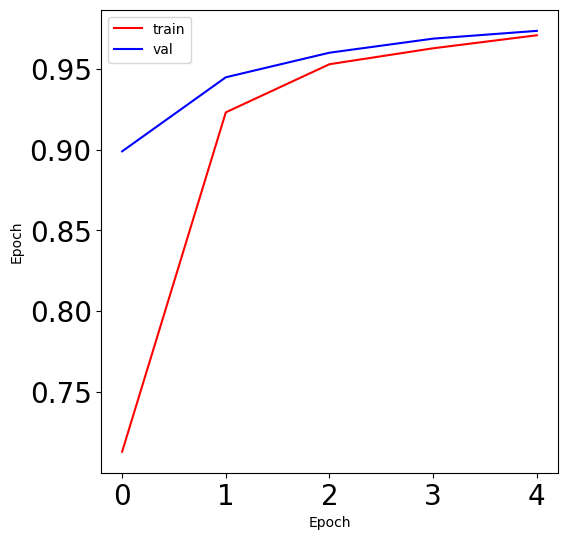

In [ ]:
i=1
plt.figure(figsize=(10,10))
plt.subplot(2,2,i)
plt.tight_layout()
plt.plot(history.history['accuracy'],'r',label='train')
plt.plot(history.history['val_accuracy'],'b',label='val')
plt.xlabel(r'Epoch',fontsize=10)
plt.ylabel(r'Epoch',fontsize=10)
plt.legend()
plt.tick_params(labelsize=20)